## k Nearest Neighbor

#### Introduction of dataset

Here we will use the customer dataset of a telecom company. The dataset was collected from IBM BigData University. These datasets are divided into four categories based on the address, age, marital status, working age, gender, income, etc. of the customer / phone users of the telecom company. The classes are 1- Basic Service 2- E-Service 3- Plus Service and 4- Total Service. Our job is to predict what class the new person will be if he is a customer of this company.

#### Load the necessary packages and the dataset

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

df = pd.read_csv('data-telecom-customer.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


#### Set the feature variables and target variables

In [79]:
X = df[['region','tenure','age','marital','address','income','ed','employ','retire','gender','reside']]
y = df['custcat']

#### Divide the data into`m 80% train and 20% test split.

In [80]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


#### Determining the perfect Value of K for this particular dataset.

In [81]:
k_range = range(1, 26)

scores = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, predictions))

print(scores)

[0.275, 0.31, 0.275, 0.26, 0.3, 0.295, 0.35, 0.33, 0.32, 0.32, 0.345, 0.33, 0.32, 0.34, 0.355, 0.32, 0.335, 0.34, 0.355, 0.345, 0.325, 0.345, 0.345, 0.34, 0.335]


Text(0, 0.5, 'Testing Acuuracy')

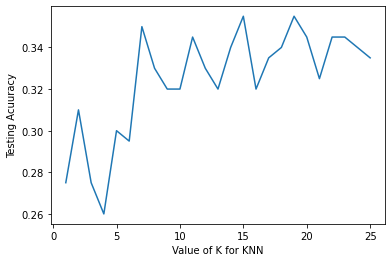

In [82]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Acuuracy')

##### Here the graphs shows the model accuracy for different value of "K". When the value of K=3, then the accuracy increase, On the other hand when the value of K=4, then the accuracy decrease. So its clear that for different value of K, sometime the accuracy is increased or decreased. Here the graph shows that when the K=7 the accuracy is fairly maximum. So for this particular dataset we determine the value of K=7. 

In [83]:
k = 7
model2 = KNeighborsClassifier(n_neighbors=k)
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [84]:
predictions = model2.predict(X_test)
predictions

array([4, 4, 1, 4, 4, 4, 3, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 2, 3, 1, 3, 3,
       4, 1, 1, 3, 1, 2, 1, 4, 1, 2, 4, 2, 1, 2, 3, 1, 1, 1, 1, 1, 3, 2,
       3, 1, 4, 1, 4, 2, 3, 4, 1, 4, 3, 1, 4, 3, 1, 1, 1, 3, 4, 2, 4, 1,
       4, 3, 3, 4, 1, 3, 4, 3, 1, 2, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 4,
       1, 4, 3, 1, 1, 3, 3, 3, 1, 4, 1, 1, 3, 1, 3, 1, 3, 2, 3, 4, 3, 1,
       2, 1, 2, 4, 3, 3, 1, 2, 3, 1, 1, 1, 3, 1, 3, 1, 4, 3, 1, 1, 3, 3,
       1, 2, 3, 3, 2, 1, 1, 3, 2, 3, 4, 1, 1, 1, 1, 4, 1, 4, 4, 3, 2, 3,
       3, 4, 3, 3, 1, 2, 3, 1, 1, 1, 3, 2, 1, 1, 3, 1, 4, 1, 3, 2, 4, 2,
       4, 4, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 2, 1, 2, 2, 1, 3,
       2, 3], dtype=int64)

#### Check the accuracy of the created model

In [88]:
print('Classification Report:\n', classification_report(y_test, predictions))
print('Confunsion Metrix:\n', confusion_matrix(y_test, predictions))
print('Accuracy Score:', accuracy_score(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           1       0.37      0.55      0.44        51
           2       0.37      0.23      0.28        44
           3       0.34      0.41      0.37        54
           4       0.30      0.20      0.24        51

    accuracy                           0.35       200
   macro avg       0.35      0.34      0.33       200
weighted avg       0.35      0.35      0.34       200

Confunsion Metrix:
 [[28  5 13  5]
 [ 8 10 18  8]
 [18  4 22 10]
 [21  8 12 10]]
Accuracy Score: 0.35


#### We can see that our model can predict 35% accurately. This standard is not very good as a model!

#### Prediction with the new observationm

In [89]:
new_observation = [[2,11,0,22,0,1,40,3,5,0,1]]
model2.predict(new_observation)

array([1], dtype=int64)

In [ ]:
We see that our new Customer belongds to class 1 thats mean the Basic Service class.